# Chicago Crime Prediction

## By Dong C. Lee

The purpose and the motivation of this tutorial is to exercise data science techniques on real-life datasets of Chicago crime incidents and develop a ML model to predict type of crimes that might happen in certain locations in Chicago. Examining and studying crime data is very important real-life concerns of preventing crimes and ensuring public safety. In respect to data science, studying with crime data is very interesting. By using data sceince techniques to examine and visualize crime data, 

## Data Processing

The data was retrieved from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2. The datsets are well orgnaized in DataFrame. The original data contains large amounts of criminal incident records from 2001 to present but I decided to focus only on 2016 data to reduce the data size.

In [1]:
import pandas as pd

In [2]:
# reading csv file
org_table = pd.read_csv("Crimes_-_2016.csv")

In [3]:
# show head of the table
org_table.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508593,HZ250410,05/03/2016 09:00:00 PM,042XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,28,26,18,1148220.0,1899677.0,2016,05/10/2016 03:56:50 PM,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,10508594,HZ250385,05/03/2016 09:35:00 PM,065XX S KEDVALE AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,13,65,06,1149830.0,1860872.0,2016,05/10/2016 03:56:50 PM,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,10508595,HZ250362,05/03/2016 02:45:00 PM,045XX S DAMEN AVE,0560,ASSAULT,SIMPLE,STREET,False,True,...,12,61,08A,1163662.0,1874660.0,2016,05/10/2016 03:56:50 PM,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,10508597,HZ250202,05/03/2016 06:42:00 PM,063XX S CLAREMONT AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,15,66,08B,1161829.0,1862607.0,2016,05/10/2016 03:56:50 PM,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,10508598,HZ250298,05/03/2016 03:00:00 PM,070XX S INDIANA AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,6,69,03,1178808.0,1858478.0,2016,05/10/2016 03:56:50 PM,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [4]:
# show column names
list(org_table)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [5]:
# dropping any rows that contain NaN value

table = org_table.dropna()

In [6]:
# drop useless data
table = table.drop('FBI Code',1)
table = table.drop('Updated On',1)
table = table.drop('Beat',1)
table = table.drop('Location Description',1)
table = table.drop('Case Number',1)
table = table.drop('IUCR',1)
table = table.drop('Arrest',1)
table = table.drop('Block',1)
table = table.drop('Description',1)
table = table.drop('Domestic',1)


I first searched for empty data. Rows with empty data are simple deleted. Deleting empty rows would not be a significant effect on the model since there are still large amount of data available. By looking at the columns of the data, I dropped irrelvant datasets and reduced data size. Date, Primary Type, and Community Area are the most essential data in this tutorial. Most of the data are irrelevant in this tutorial. I kept X Coordinate, Y Coordinate, Latitude, Longitude, and Location just in case they may be useful in later analysis.

In [7]:
table.head()

,ID,Date,Primary Type,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10508593,05/03/2016 09:00:00 PM,NARCOTICS,11,28,26,1148220.0,1899677.0,2016,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,10508594,05/03/2016 09:35:00 PM,THEFT,8,13,65,1149830.0,1860872.0,2016,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,10508595,05/03/2016 02:45:00 PM,ASSAULT,9,12,61,1163662.0,1874660.0,2016,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,10508597,05/03/2016 06:42:00 PM,BATTERY,8,15,66,1161829.0,1862607.0,2016,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,10508598,05/03/2016 03:00:00 PM,ROBBERY,3,6,69,1178808.0,1858478.0,2016,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [8]:
# make a list of crime types
types = []
crime_type = table['Primary Type']
for x,y in crime_type.iteritems():
    if y not in types:
        types.append(y)
        
# check number of occurences for each crime type.
type_occ = {}
for x in types:
    type_occ[x] = 0

for x,y in crime_type.iteritems():
    type_occ[y] = type_occ[y] + 1


In [9]:
# deleting crime types that have less than 10000 occurrences
less = []
for x in type_occ:
    if type_occ[x] < 10000:
        less.append(x)

# dropping values in Primary Type
for x in less:
    table = table[table["Primary Type"] != x]

The size of the data had been reduced by deleting rows that had crime types with less than 10000 cases reported. By doing this, only major crime types will be calculated into the model.

In [10]:
table.head()

,ID,Date,Primary Type,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10508593,05/03/2016 09:00:00 PM,NARCOTICS,11,28,26,1148220.0,1899677.0,2016,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,10508594,05/03/2016 09:35:00 PM,THEFT,8,13,65,1149830.0,1860872.0,2016,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,10508595,05/03/2016 02:45:00 PM,ASSAULT,9,12,61,1163662.0,1874660.0,2016,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,10508597,05/03/2016 06:42:00 PM,BATTERY,8,15,66,1161829.0,1862607.0,2016,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,10508598,05/03/2016 03:00:00 PM,ROBBERY,3,6,69,1178808.0,1858478.0,2016,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [11]:
import re

In [12]:
# a pattern to match Date
pattern = '(.+) (\d\d):(\d\d):\d\d (.+)'

# retrieve Date
date_list = table.Date.tolist()


In [13]:
# match pattern and replace Date data
# minutes are ignored
# convert AM and PM system

new_date_list = []
for x in date_list:
    result = re.match(pattern,x)
    
    # grouped values
    date = result.group(1)
    hr = result.group(2)
    am_pm = result.group(4)
    
    hr = int(hr)
    
    # add 12 to hour if it's PM
    if am_pm == 'PM':
        hr = hr + 12
    
    # append 0 to hours less than 10 to match format
    if hr < 10:
        hr = str(hr)
        hr = '0' + hr
    else:
        hr = str(hr)

    # subtitute original date with new date and add to the new date list
    sub = re.sub(pattern, date + " " + hr + ":00" ,result.group(0))
    new_date_list.append(sub)

In [14]:
# create new dataframe and series of New Date
df = pd.DataFrame({'New_Date': new_date_list})
s = df['New_Date']

Here, I used regex module to parse Date data to make New_date column. 'AM' and 'PM' are dropped to get a 24 hour measurement. Minutes are also dropped so that time measurement is simple and less complicated.

In [15]:
# reset index to match IDs and concantenate the data table with New Date
table = table.reset_index(drop=True)
table = pd.concat([table,s],axis=1)
table.head()


,ID,Date,Primary Type,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,New_Date
0,10508593,05/03/2016 09:00:00 PM,NARCOTICS,11,28,26,1148220.0,1899677.0,2016,41.880658,-87.731212,"(41.880658176, -87.731212135)",05/03/2016 21:00
1,10508594,05/03/2016 09:35:00 PM,THEFT,8,13,65,1149830.0,1860872.0,2016,41.774141,-87.726307,"(41.77414081, -87.726307093)",05/03/2016 21:00
2,10508595,05/03/2016 02:45:00 PM,ASSAULT,9,12,61,1163662.0,1874660.0,2016,41.811698,-87.675214,"(41.811697721, -87.675214316)",05/03/2016 14:00
3,10508597,05/03/2016 06:42:00 PM,BATTERY,8,15,66,1161829.0,1862607.0,2016,41.778661,-87.682273,"(41.778661058, -87.68227253)",05/03/2016 18:00
4,10508598,05/03/2016 03:00:00 PM,ROBBERY,3,6,69,1178808.0,1858478.0,2016,41.766961,-87.620152,"(41.766961034, -87.620152116)",05/03/2016 15:00


In [16]:
# divide date and time to different columns
pattern = '^(\d\d)/(\d\d)/2016 (\d\d:\d\d)$'

# get New_Date as dict
new_date_list = table['New_Date'].tolist()

In [17]:
# split New_Date into Time, Day, and Month
time_list = []
day_list = []
month_list = []

# iterate New_Date and split into Time, Day, and Month lists
for x in new_date_list:
    result = re.match(pattern,x)
    
    month = result.group(1)
    day = result.group(2)
    hr = result.group(3)
    
    time_list.append(hr)
    day_list.append(day)
    month_list.append(month)

In [19]:
df = pd.DataFrame({'Time': time_list, 'Day': day_list, 'Month': month_list})
s1 = df['Month']
s2 = df['Day']
s3 = df['Time']

# concatenate new columns to the data table
table = pd.concat([table,s1,s2,s3],axis=1)
table.head()

,ID,Date,Primary Type,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,New_Date,Month,Day,Time
0,10508593,05/03/2016 09:00:00 PM,NARCOTICS,11,28,26,1148220.0,1899677.0,2016,41.880658,-87.731212,"(41.880658176, -87.731212135)",05/03/2016 21:00,05,03,21:00
1,10508594,05/03/2016 09:35:00 PM,THEFT,8,13,65,1149830.0,1860872.0,2016,41.774141,-87.726307,"(41.77414081, -87.726307093)",05/03/2016 21:00,05,03,21:00
2,10508595,05/03/2016 02:45:00 PM,ASSAULT,9,12,61,1163662.0,1874660.0,2016,41.811698,-87.675214,"(41.811697721, -87.675214316)",05/03/2016 14:00,05,03,14:00
3,10508597,05/03/2016 06:42:00 PM,BATTERY,8,15,66,1161829.0,1862607.0,2016,41.778661,-87.682273,"(41.778661058, -87.68227253)",05/03/2016 18:00,05,03,18:00
4,10508598,05/03/2016 03:00:00 PM,ROBBERY,3,6,69,1178808.0,1858478.0,2016,41.766961,-87.620152,"(41.766961034, -87.620152116)",05/03/2016 15:00,05,03,15:00


New_Date column is parsed agained and splited into Month, Day, and Time columns. Month ranges from 01 to 12, Day 01 to 31, and Time 00:00 to 23:00.

## Date Analysis

During this phase, relation variables will be examined and show interactions between the data.

In [20]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Finding occurrences of months
month = []
month_data = table['Month']

# list of months (1-12)
for x,y in month_data.iteritems():
    if y not in month:
        month.append(y)

# sort to match month
month.sort()

# initialize to 0
month_occ = {}
for x in month:
    month_occ[x] = 0
    
# record occurrence of each month
for x,y in month_data.iteritems():
    month_occ[y] = month_occ[y] + 1

occur = month_occ.values()

In [22]:
# Set month names
objects = ('Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
y_pos = np.arange(len(objects))

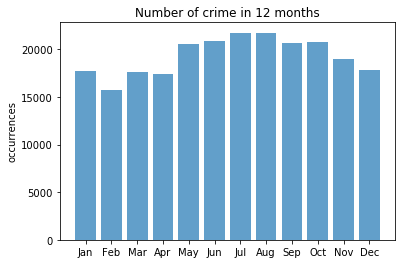

In [23]:
# plot data of month
plt.bar(y_pos,occur,align='center',alpha = 0.7)
plt.xticks(y_pos, objects)
plt.ylabel('occurrences')
plt.title('Number of crime in 12 months')
plt.show()

The bar graph shows the relationship between the number of crimes and a month. It seems like there is no clear relationship between the two variables.

In [24]:
# same process for hours vs crime occurrences
time = []
time_data = table['Time']

for x,y in time_data.iteritems():
    if y not in time:
        time.append(y)
time.sort()

time_occ = {}

for x in time:
    time_occ[x] = 0
    
for x,y in time_data.iteritems():
    time_occ[y] = time_occ[y] + 1
    
occur = time_occ.values()

In [25]:
objects = ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24')
y_pos = np.arange(len(objects))

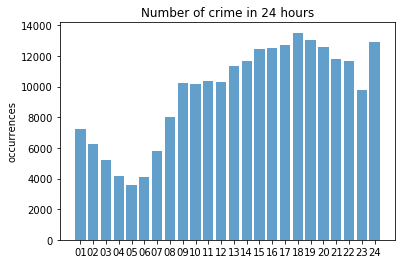

In [26]:
plt.bar(y_pos,occur,align='center',alpha = 0.7)
plt.xticks(y_pos, objects)
plt.ylabel('occurrences')
plt.title('Number of crime in 24 hours')
plt.show()

This graph represents the relationship between the number of crimes and hours. Here, it seems like there are more crime occurrences from 3 PM to 8PM than around 5 AM. There is a sudden increase in crime rate at 12 AM and suddent decrease at 1 AM.

In [27]:
# Community vs Crime occurrences
area = []
area_data = table['Community Area']

for x,y in area_data.iteritems():
    if y not in area:
        area.append(y)
area.sort()

area_occ = {}

for x in area:
    area_occ[x] = 0
    
for x,y in area_data.iteritems():
    area_occ[y] = area_occ[y] + 1

# need to sort occurence to get community areas where crimes were over 5000
# ploting all 77 community areas would look too compicated
occur = area_occ.values()
occ = sorted(occur)

In [28]:
comm = []
occur = []
for x in occ:
    for y in area_occ:
        
        # record community areas where crimes occurred over 5000 cases
        if x == area_occ[y] and x > 5000:
            comm.append(y)
            occur.append(x)

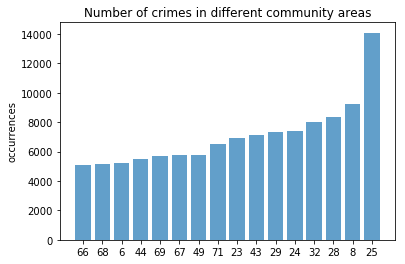

In [29]:
# plot crime occurrence vs 
y_pos = np.arange(len(comm))

plt.bar(y_pos,occur,align='center',alpha = 0.7)
plt.xticks(y_pos, comm)
plt.ylabel('occurrences')
plt.title('Number of crimes in different community areas')
plt.show()

This graph examines where crimes are mostly likely to happen. The numbers represent the community area code. These are the community areas where crimes occurred more than 5000 cases. It seems like community area 25 has the highest crime rate. 

In [30]:
crime_data = table['Primary Type']
crime = []

for x,y in crime_data.iteritems():
    if y not in crime:
        crime.append(y)
crime.sort()

crime_occ = {}

for x in crime:
    crime_occ[x] = 0
    
for x,y in crime_data.iteritems():
    crime_occ[y] = crime_occ[y] + 1
    
occur = crime_occ.values()
occ = sorted(occur)
occ
crime_occ

{'ASSAULT': 18076,
 'BATTERY': 48668,
 'BURGLARY': 13614,
 'CRIMINAL DAMAGE': 30186,
 'DECEPTIVE PRACTICE': 13510,
 'MOTOR VEHICLE THEFT': 10920,
 'NARCOTICS': 10663,
 'OTHER OFFENSE': 15882,
 'ROBBERY': 11603,
 'THEFT': 58329}

In [31]:
crim = []
occur = []
for x in occ:
    for y in crime_occ:
        if x == crime_occ[y]:
            crim.append(y)
            occur.append(x)

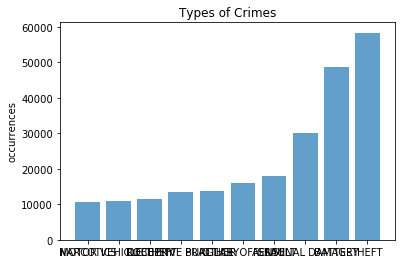

In [32]:

y_pos = np.arange(len(crim))

plt.bar(y_pos,occur,align='center',alpha = 0.7)
plt.xticks(y_pos, crim)
plt.ylabel('occurrences')
plt.title('Types of Crimes')
plt.show()

This shows which type of crimes occurred the most in Chicago.